# Exercises on lists, dictionnaries, functions and arrays

To save time, for the following exercise, you can keep the function documentation to their minimum. 

In [1]:
import numpy as np 
from matplotlib import pyplot as plt  # This is optional ; Only for visualising results of Exr. (9)

1) Find the smallest element in a list of floats (or integers) without using numpy (you can use a `for loop`. 

In [2]:
l = [1., 3., 5., -4., 8.]

smallest = l[0]
for i in range(1, len(l), 1):
    if l[i] < smallest:
        smallest = l[i]

print(smallest)

-4.0


In [3]:
# even simpler 
min(l)

-4.0

In [4]:
# ANother nice one (but which modifies the list ...)
l.sort()
print('smallest =', l[0] )

smallest = -4.0


2) Write a Python function that takes two lists and returns `True` if they have at least one common member. 

In [5]:
def compa_list(l1, l2):
    '''
    Description: Compares 2 lists
    
    Parameters: l1, l2: lists 
    
    Returns: 
    True if at least 1 elements is in common
    '''
    flag = False
    for i in range(len(l1)):
        for j in range(len(l2)):
            if l1[i] == l2[j]:
                flag = True
    return flag 

In [6]:
l1 = [1, 2, 'a', 13, 12]
l2 = [11 , 121, 4]

compa_list(l1, l2)

False

In [7]:
l1 = [1, 2, 'a', 13, 12]
l2 = [11 , 121, 4, 13]

compa_list(l1, l2)

True

3) Remove even numbers from a list of integers. 

In [8]:
0 % 2

0

In [9]:
L = [1,2,2,3,3,4,5,6,7]
L = [ x for x in L if x%2 != 0 ]
L

[1, 3, 3, 5, 7]

In [10]:
# longer version
# L = list(np.arange(0,10))  # creating a list by converting a np.array
#L = list(range(0,10))  # creating a list from range
L_no_even = []
for l in L:
    if l % 2 != 0:
        L_no_even.append(l)
L_no_even

[1, 3, 3, 5, 7]

The two solutions above imply creating a NEW list, not working with the list in-place.    
We will see below why working with the list "in place" causes troubles. 

In [11]:
# Same solution with a for loop: This does NOT work properly 
# After the second loop, you drop element #1, but for the next loop you go to element #2 ... 
# but your previous element #2 is now element #1  
L = [1,2,2,3,3,4,5,6,7]
for i, l in enumerate(L):
    print(i, L)
    if l % 2 == 0:
        L.pop(i)     
L

0 [1, 2, 2, 3, 3, 4, 5, 6, 7]
1 [1, 2, 2, 3, 3, 4, 5, 6, 7]
2 [1, 2, 3, 3, 4, 5, 6, 7]
3 [1, 2, 3, 3, 4, 5, 6, 7]
4 [1, 2, 3, 3, 4, 5, 6, 7]
5 [1, 2, 3, 3, 5, 6, 7]


[1, 2, 3, 3, 5, 7]

In [12]:
# BUT BE CAREFUL, the following solution does NOT work either ... for similar reasons as above: 
# the size of the array is getting reduced after each call of "pop()"
L = list(range(0,10)) 
for i in range(len(L)):
    if L[i] % 2 == 0:
        L.pop(i)
L

IndexError: list index out of range

In [13]:
# A possibility is to go through the list backwards 
L = list(range(0,10)) 
for i in reversed(range(len(L))):
    if L[i] % 2 == 0:
        L.pop(i)
L

[1, 3, 5, 7, 9]

4) Write a command to remove duplicates (i.e. non unique values) from a list 

In [14]:
L = [1, 2, 3, 4, 1, 10,1 , 3, 2]
set(L), type(set(L))

({1, 2, 3, 4, 10}, set)

In [15]:
L = [1, 2, 3, 4, 1, 10,1 , 3, 2]
L2 = list(set(L))  # This converts the set into a list 
L_Not_good_list = [set(L)]  # THIS DOES NOT convert your set into a list
L2

[1, 2, 3, 4, 10]

5) Create a list by concatenating a given list of string L1 with integers ranging from 1 to n.   
Sample list : `L1 =  ['fa_', 'fb_']`     
`n = 4`   
Sample Output : `['fa_1', 'fa_2', 'fa_3', 'fa_4', 'fb_1', 'fb_2', 'fb_3', 'fb_4']`   

In [16]:
# List comprehansion version
L1 = ['fa_', 'fb_']
L2 = [l+str(i) for l in L1 for i in range(1,5)]
L2

['fa_1', 'fa_2', 'fa_3', 'fa_4', 'fb_1', 'fb_2', 'fb_3', 'fb_4']

In [17]:
# Long version
L1 = ['fa_', 'fb_']
L2 = []
for l in L1:
    for i in range(1,5):
        L2.append( l + str(i) )
L2

['fa_1', 'fa_2', 'fa_3', 'fa_4', 'fb_1', 'fb_2', 'fb_3', 'fb_4']

6) Find missing and additional values in two lists.     
Sample lists: list1 = ['a','b','c','d','e','f'], list2 = ['d','e','f','g','h']    
Expected output: 
```python
Missing values in second list:  ['c', 'b', 'a']
Additional values in second list:  ['h', 'g']
```

*TIP:* Search in the help if there is no built-in method associated to `set` that could be helpful . 

In [19]:
help(set.difference)

Help on method_descriptor:

difference(...)
    Return the difference of two or more sets as a new set.
    
    (i.e. all elements that are in this set but not the others.)



In [20]:
list1 = ['a','b','c','d','e','f']
list2 = ['d','e','f','g','h']
print('Missing values in second list: ', list(set(list1).difference(set(list2))))
print('Additional values in second list: ', list(set(list2).difference(set(list1))))

Missing values in second list:  ['b', 'c', 'a']
Additional values in second list:  ['g', 'h']


7) You have a tuple `tup = (1, 2, 'a', 3)`. How do you convert this tuple into 4 variables named `v1`, `v2`, `v3`, `v4`

In [21]:
tup = (1, 2, 'a', 3)
v1, v2, v3, v4 = tup 
v1, v2, v3, v4 

(1, 2, 'a', 3)

In [22]:
# long way 
v1 = tup[0]
v2 = tup[1] 
v3 = tup[2]
v4 = tup[3]

#### Intermezzo

*This is more advanced material*   
The above code explains how to associate a value to a fixed variable name. But how to dynamically create a variable name? A possibility is to use dictionnaries. The name of the variable (and its value) are stored in a dictionnary. One can then even go one step forward and modify the `globals()` dictionnary (the dictionnary that stores all you variable) to define `globals()` variables. The same is true with the local dict `locals()`. The manipulation/use of those dict. is sometimes slippery and needs to be performed with care. See also some discussions [here](https://stackoverflow.com/questions/5036700/how-can-you-dynamically-create-variables)

In [23]:
# To dynamically attribute a value to a variable with a different name ... 
# but the variable and its value are in a dictionnaty 
mydict = {}
for i, v in enumerate(tup):
    mydict['vv%i'%i] =  v
print(mydict)
print(mydict['vv0'])

{'vv0': 1, 'vv1': 2, 'vv2': 'a', 'vv3': 3}
1


In [24]:
def test():
    tup3 = (0, 'a', [1,2,3.4], 6.)
    for i, v in enumerate(tup3):
        locals()['v_loc%i'%i] =  v
        
    for i, v in enumerate(tup3):
        globals()['v_glob%i'%i] =  v
#    print(v_loc0, v_loc2)
    for i in range(len(tup3)):
        print('test: v_loc%i'%i, locals()['v_loc%i'%i])
    return

In [25]:
test()

test: v_loc0 0
test: v_loc1 a
test: v_loc2 [1, 2, 3.4]
test: v_loc3 6.0


In [26]:
# An alternative is to use the "exec" command. This command will also set a global variable 
tup2 = (0, 'a', [1,2,3.4], 6.)
for i, v in enumerate(tup2):
    vv = v
    exec('vv%i = vv'%i)
print(vv0, vv1, vv2, vv3)

0 a [1, 2, 3.4] 6.0


An alternative (more advanced) approach (which I find cleaner/more tractable) is to create an object and use the `setattr()` command to associate variables to that object (the new variables are attribute of your new object). 

In [27]:
class myclass:
    def __init__(self):
        self.__dict__ = {}

a = myclass()
for i, v in enumerate(tup2):
    setattr(a, 'vv%i'%i, v)
print(a.vv0, a.vv1, a.vv2, a.vv3)

0 a [1, 2, 3.4] 6.0


8) Write a function "convert_temperature()" that converts degrees celcius into Farenheit and vice-versa. Write your function such that the user enters the temperature (integer value) followed by "F" for farenheit and "C" for degrees. The conversion between degrees and Farenheit is the following: 

$$ 
\frac{C}{5} = \frac{(F - 32)}{9}
$$

Try to use the `input` command such that the user can answer interactively to the following question: "Input the  temperature you like to convert? (e.g., 45F, 102C etc.) : " 

In [28]:
input_value = input('Give me a number')

Give me a number 134F


In [29]:
input_value

'134F'

In [30]:
def convert_temperature():
    '''
    '''
    temp = input("Input the  temperature you like to convert? (e.g., 45F, 102C etc.) : ")  # Interactive sentence 
    degree = int(temp[:-1])
    unit = temp[-1]

    if unit.upper() == "C":  # unit.upper() to work with capital and non capital input letter
        result = int( (9 * degree) / 5 + 32)
        o_unit = "Fahrenheit"
    elif unit.upper() == "F":
        result = int( (degree - 32) * 5 / 9)
        o_unit = "Celsius"
    else:
        print("I could not recognize the convention")
        return
    print("The temperature in", o_unit, "is", result, "degrees.")
    return

In [31]:
convert_temperature()

Input the  temperature you like to convert? (e.g., 45F, 102C etc.) :  45F


The temperature in Celsius is 7 degrees.


9) Calculate Fibonacci series between up to the value of your choice. The Fibonacci Sequence is the series of numbers : 0, 1, 1, 2, 3, 5, 8, 13, 21, ... Every next number is found by adding up the two numbers before it. Check that the ratio between a value of the series and the previous one (after 3rd one) converges to the "gold number" $\phi = $ 1.618... 

In [32]:
x,y=0,1
Lx = []
Ratio = []
while y < 150:
#    print(y)
    x, y = y, x+y
    Lx.append(x)
    Ratio.append(y / x)

In [33]:
Ratio

[1.0,
 2.0,
 1.5,
 1.6666666666666667,
 1.6,
 1.625,
 1.6153846153846154,
 1.619047619047619,
 1.6176470588235294,
 1.6181818181818182,
 1.6179775280898876,
 1.6180555555555556]

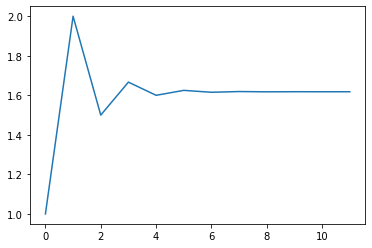

In [34]:
plt.plot(Ratio)

10) Write a function to check if a string reprensents an integer or not. (e.g. '12345' is an integer but '123d45' is NOT an integer). 

In [35]:
def check_string(s):
    '''
    '''
    for j, ss in enumerate(s):
        if ss not in '-0123456789':
            print('Input is not an integer')
            return 
        if (j != 0) & (ss in '-'):   # in cas of a minus sign that does not correspond to a negative integer
            print('Input is not an integer')
            return
    print('Input is an integer')
    return 

In [36]:
s = '123a45'
for j, s in enumerate(s):
    print('j=', j , 'value=', s)

j= 0 value= 1
j= 1 value= 2
j= 2 value= 3
j= 3 value= a
j= 4 value= 4
j= 5 value= 5


In [37]:
s = '123a45'
check_string(s)

Input is not an integer


In [38]:
s = '12345-3'
check_string(s)

Input is not an integer


In [39]:
s = '-15673'
check_string(s)

Input is an integer


11) Create a 3x3 numpy array with values ranging from 2 to 10.    
Expected output     

```
array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])
```

In [40]:
# 1D array from 2 to 10 
np.arange(2, 11)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [41]:
a = np.arange(2, 11) # a is 1D array
a.reshape((3,3))

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [42]:
a_3by3 = np.arange(2,11).reshape((3,3))
a_3by3

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

12) Reverse a 1D numpy array (first element becomes last).    

```
[INPUT] array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
[OUTPUT] array([49, 48, 47, 46, 45, 44, 43, 42, 41, 40])
```

In [43]:
a = np.arange(40,50)
a_reverse = a[::-1]
a, a_reverse

(array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([49, 48, 47, 46, 45, 44, 43, 42, 41, 40]))

In [44]:
# a more explicit command 
a[10::-1]

array([49, 48, 47, 46, 45, 44, 43, 42, 41, 40])

13) Write a numpy code to "add" a border filled with 0's around an existing 2D array. Take an array of 3x3 filled with ones.    
TIP: Search how to use the `numpy.pad()` method. 

In [45]:
x = np.zeros((3,3)) + 1
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [46]:
#help(np.pad)

In [47]:
x = np.ones((3,3))
print("Original array:")
print(x)
print("0 on the border and 1 inside in the array")
x = np.pad(x, pad_width=1, mode='constant', constant_values=0)
print(x)

Original array:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
0 on the border and 1 inside in the array
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]


14) Concatenate the 3 arrays `a1=[10, 20, 30]`, `a2 = [40, 50, 60]`, `a3=[70, 80, 90]` into a single array `[10 20 30 40 50 60 70 80 90]` (there are at least 2 ways to reach the result with a single command line: try them both). 

In [48]:
a1 = np.array([10, 20, 30])
a2 = np.array([40, 50, 60])
a3 = np.array([70, 80, 90])
print("Original array:")
print(a1)
a1 = np.append(a1, [a2, a3])
print("After append values to the end of the array:")
print(a1)

Original array:
[10 20 30]
After append values to the end of the array:
[10 20 30 40 50 60 70 80 90]


In [49]:
# Second method
a1 = np.array([10, 20, 30])
a2 = np.array([40, 50, 60])
a3 = np.array([70, 80, 90])
np.concatenate((a1,a2,a3))

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [50]:
# horizontal stack
np.hstack((a1,a2,a3))

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [51]:
# to stack arrays ... 
np.vstack((a1,a2,a3))

array([[10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

15) Sort the following array of shape=(3,2) `[[10, 5, 1], [20, 8, 2], [5, 2, 0]]` along the first axis, last axis and on flattened array. Compare the results. How do you get the indices that would sort your array ? 

In [52]:
a = np.array([[10, 5, 1], [20, 8, 2], [5, 2, 0]])
a

array([[10,  5,  1],
       [20,  8,  2],
       [ 5,  2,  0]])

In [53]:
np.sort(a, axis=0)

array([[ 5,  2,  0],
       [10,  5,  1],
       [20,  8,  2]])

In [54]:
np.sort(a)

array([[ 1,  5, 10],
       [ 2,  8, 20],
       [ 0,  2,  5]])

In [55]:
np.sort(a.flatten())

array([ 0,  1,  2,  2,  5,  5,  8, 10, 20])

In [56]:
# Indices that would sort the original array (for each columns)
qq = np.argsort(a, axis=0)
qq

array([[2, 2, 2],
       [0, 0, 0],
       [1, 1, 1]])

16) Using numpy methods/function, compute the mean, standard deviation, and variance of a given 2D array (e.g. of shape (3,4)) along the second axis (i.e. average of the rows).      

BONUS: Calculate the variance using the formula of the variance. For an ensemble of values ${x_1, x_2, ..., x_n}$, the variance is given by: 
$$
\sigma^2 = \sum_i^n \frac{(x_i - \bar{x})^2}{n}, 
$$
where ${\bar{x}}$ is is the mean of $x_i$

In [57]:
x = np.array([[1, 2, 3, 2], [10, 20, 20, 30], [25, 30, 30, 35]])
print("Original array:")
print(x)
r1 = np.mean(x, axis=1)
print("Mean: ", r1)
r1 = np.std(x, axis=1)
print("std: ", r1)
r1= np.var(x, axis=1)
# Direct calculation of the variance  
r2 = np.mean( (x - np.mean(x, axis=1).reshape(3, -1))**2 , axis=1)   # x needs to be reshaped to have 3 rows and 1 column
#assert np.allclose(r1, r2)
print("variance: ", r1)
print("variance: ", r2)

Original array:
[[ 1  2  3  2]
 [10 20 20 30]
 [25 30 30 35]]
Mean:  [ 2. 20. 30.]
std:  [0.70710678 7.07106781 3.53553391]
variance:  [ 0.5 50.  12.5]
variance:  [ 0.5 50.  12.5]


17) Find which elements in a numpy array are NaN (TIP: for a NaN, a != a). Use the numpy help to find if which numpy methods allow you to find if there are infinite / finite (ignoring Nan, inf) values in an array, and/or find if there are nans. Is there also methods allowing you to calculate the mean, min, max, ... ignoring NaN ?     
Examples / test arrays:     
```python 
a = np.array([1, np.nan, 3, -np.inf, -4, np.inf, 19])
b = np.array([1, np.nan, 3, -1, -4, 4])
```

In [58]:
a = np.array([1, np.nan, 3, -np.inf, -4, np.inf, 19])
b = np.array([1, np.nan, 3, -1, -4, 4])
a

array([  1.,  nan,   3., -inf,  -4.,  inf,  19.])

In [59]:
# Identify nan without using builtin command
np.where(a!=a)

(array([1]),)

In [60]:
np.isnan(a)

array([False,  True, False, False, False, False, False])

In [61]:
# np.isnan returns an array of booleans 
# If I want to know which index, I can built an array with the indices and use the output of isnan() as a mask 
indices = np.arange(len(a))
print('Element %i is a NaN'%(indices[np.isnan(a)]))
print('Elements', indices[np.isinf(a)], ' are a inf')

Element 1 is a NaN
Elements [3 5]  are a inf


In [62]:
# To know which indices are finite
print('Elements', indices[np.isfinite(a)], ' are a not inf or nan')

Elements [0 2 4 6]  are a not inf or nan


In [63]:
# Calculate the mean, min, max ignoring nan
print('mean = ', np.nanmean(b))
print('min = ', np.nanmin(b))
print('max = ', np.nanmax(b))

mean =  0.6
min =  -4.0
max =  4.0


In [64]:
# However, if there are inf, the command yields an error message 
print('mean = ', np.nanmean(a))

mean =  nan


/Users/dsluse/miniconda3/envs/intel-python3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [65]:
# For that case, the best is to use "np.isfinite" to exclude inf and nans
print('mean of a: ', a[np.isfinite(a)].mean()) 
# or 
print('mean of a: ', np.mean(a[np.isfinite(a)])) 

mean of a:  4.75
mean of a:  4.75


In [66]:
# Broadcasting is a bit faster than calling the method 
print('Speed for broadcasting')
%timeit a[np.isfinite(a)].mean()
print('Speed for method call')
%timeit np.mean(a[np.isfinite(a)])

Speed for broadcasting
The slowest run took 7.70 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 9.05 µs per loop
Speed for method call
The slowest run took 4.58 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 11.3 µs per loop


18) Remove the leading and trailing white spaces from this list of strings: `L = [' I ', ' love', '   white ', ' spaces']` .     
Expected output:    
`['I', 'love', 'white', 'spaces']`

In [67]:
' I '.strip()

'I'

In [68]:
L = [' I ', ' love', '   white ', ' spaces']
L2 = [l.strip() for l in L]
L2

['I', 'love', 'white', 'spaces']

19) Convert the following string 'model, 1 , 13, 14 \n' into the following np.array of strings `array(['model', '1', '13', '14'], dtype='<U5')`.  

In [69]:
s = 'model, 1 , 13, 14 \n'
s2 = s.split(sep=(','))
print('s2 before cleaning: ', s2)
s2 = [ss.replace('\n', '').strip() for ss in s2]
s2

s2 before cleaning:  ['model', ' 1 ', ' 13', ' 14 \n']


['model', '1', '13', '14']

In [70]:
# Conversion into an array
s2_a = np.array(s2)
s2_a

array(['model', '1', '13', '14'], dtype='<U5')

## Reference

Some of the exercises from this notebook are inspired by exercises from https://www.w3resource.com/python-exercises/ .   
More training exercises can be found there. Several more training exercises are also available on this github (some include also training to Matplotlib): 
- [Python_training_exercises.ipynb](Python_training_Exercises.ipynb)
- [Python_training_exercises_2.ipynb](Python_training_Exercises_2.ipynb)
- [Python_training_exercises_3.ipynb](Python_training_Exercises_3.ipynb)